# Project outline

Objective: predict % of silica in the iron ore concentrate.

Attention points:
* Data is not sampled in uniform frequency
* Columns 2 and 3 are before feeding into the process (consider retention time)
* Columns 4:8 are relevant quality measurements in the end of the process (probably doesnt need retention time)
* Columns 9:22 are process data
* Last column is % of silica in the iron ore concentrate and is a lab measurement


### Packages imports

In [74]:
import typing as t

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Data import

In [45]:
df = pd.read_csv('../data/MiningProcess_Flotation_Plant_Database.csv', decimal=',')  # Adjusts data format
df.columns = df.columns.str.lower().str.replace(' ', '_')  # improves data manipulation
df['date'] = pd.to_datetime(df['date'])
# df.set_index('date', inplace=True)

df.tail(2)

,date,%_iron_feed,%_silica_feed,starch_flow,amina_flow,ore_pulp_flow,ore_pulp_ph,ore_pulp_density,flotation_column_01_air_flow,flotation_column_02_air_flow,...,flotation_column_07_air_flow,flotation_column_01_level,flotation_column_02_level,flotation_column_03_level,flotation_column_04_level,flotation_column_05_level,flotation_column_06_level,flotation_column_07_level,%_iron_concentrate,%_silica_concentrate
737451,2017-09-09 23:00:00,49.75,23.2,1164.12,491.548,384.976,9.61686,1.65324,302.550,301.959,...,308.115,405.107,466.832,876.591,407.299,502.301,340.844,433.966,64.27,1.71
737452,2017-09-09 23:00:00,49.75,23.2,1164.12,468.019,384.801,9.61497,1.65310,300.355,292.865,...,308.115,413.754,514.143,881.323,378.969,500.100,374.354,441.182,64.27,1.71


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   date                          737453 non-null  datetime64[ns]
 1   %_iron_feed                   737453 non-null  float64       
 2   %_silica_feed                 737453 non-null  float64       
 3   starch_flow                   737453 non-null  float64       
 4   amina_flow                    737453 non-null  float64       
 5   ore_pulp_flow                 737453 non-null  float64       
 6   ore_pulp_ph                   737453 non-null  float64       
 7   ore_pulp_density              737453 non-null  float64       
 8   flotation_column_01_air_flow  737453 non-null  float64       
 9   flotation_column_02_air_flow  737453 non-null  float64       
 10  flotation_column_03_air_flow  737453 non-null  float64       
 11  flotation_col

In [47]:
# Data has repeated timestamps, probably due to low resolution on timestamps 
# According to database source: "Some columns were sampled every 20 second"

time_frequency = (df['date'].max() - df['date'].min())/(len(df) - 1)  # -1 since total lenght is an even number
time_frequency  # time_frequency is also showing average data collection frequency equal to 20 seconds

Timedelta('0 days 00:00:21.547707511')

In [48]:
df.isna().sum()

date                            0
%_iron_feed                     0
%_silica_feed                   0
starch_flow                     0
amina_flow                      0
ore_pulp_flow                   0
ore_pulp_ph                     0
ore_pulp_density                0
flotation_column_01_air_flow    0
flotation_column_02_air_flow    0
flotation_column_03_air_flow    0
flotation_column_04_air_flow    0
flotation_column_05_air_flow    0
flotation_column_06_air_flow    0
flotation_column_07_air_flow    0
flotation_column_01_level       0
flotation_column_02_level       0
flotation_column_03_level       0
flotation_column_04_level       0
flotation_column_05_level       0
flotation_column_06_level       0
flotation_column_07_level       0
%_iron_concentrate              0
%_silica_concentrate            0
dtype: int64

In [49]:
# Add secconds to timestamps to improve data analysis. 
# It is expected that some features remain "freezed" since some features "were sampled on a hourly base"

new_index = pd.date_range(start=df['date'].iloc[0], end=df['date'].iloc[-1], freq='21.547707511S')
df.index = new_index
df = df.drop(columns='date')

df.head(2)

C:\Users\Gabriel Bonanato\AppData\Local\Temp\ipykernel_17200\4211638186.py:4: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  new_index = pd.date_range(start=df['date'].iloc[0], end=df['date'].iloc[-1], freq='21.547707511S')


,%_iron_feed,%_silica_feed,starch_flow,amina_flow,ore_pulp_flow,ore_pulp_ph,ore_pulp_density,flotation_column_01_air_flow,flotation_column_02_air_flow,flotation_column_03_air_flow,...,flotation_column_07_air_flow,flotation_column_01_level,flotation_column_02_level,flotation_column_03_level,flotation_column_04_level,flotation_column_05_level,flotation_column_06_level,flotation_column_07_level,%_iron_concentrate,%_silica_concentrate
2017-03-10 01:00:00.000000000,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,250.576,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
2017-03-10 01:00:21.547707511,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,250.862,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31


In [50]:
# It is not expected that a high frequency of data (every 20 seconds) to be that relevant. Data re-sampled to every minute

df = df.resample('1T').mean()
df.head(2)

C:\Users\Gabriel Bonanato\AppData\Local\Temp\ipykernel_17200\1373515036.py:3: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df = df.resample('1T').mean()


,%_iron_feed,%_silica_feed,starch_flow,amina_flow,ore_pulp_flow,ore_pulp_ph,ore_pulp_density,flotation_column_01_air_flow,flotation_column_02_air_flow,flotation_column_03_air_flow,...,flotation_column_07_air_flow,flotation_column_01_level,flotation_column_02_level,flotation_column_03_level,flotation_column_04_level,flotation_column_05_level,flotation_column_06_level,flotation_column_07_level,%_iron_concentrate,%_silica_concentrate
2017-03-10 01:00:00,55.2,16.98,3029.133333,563.151000,397.588000,10.067200,1.74,249.558000,250.547000,250.583667,...,249.316333,453.509000,443.816333,430.834333,447.110667,494.343000,446.706000,493.328667,66.91,1.31
2017-03-10 01:01:00,55.2,16.98,3053.383333,563.843000,398.242000,10.069700,1.74,250.283333,251.843000,249.821667,...,250.649333,449.755333,451.444667,451.279000,446.600000,461.865667,438.303667,426.268667,66.91,1.31
2017-03-10 01:02:00,55.2,16.98,3142.663333,560.424667,394.736333,10.072167,1.74,250.115000,252.312000,249.038000,...,252.568667,446.285333,461.432333,457.683000,442.823000,441.692000,454.694333,445.615000,66.91,1.31
2017-03-10 01:03:00,55.2,16.98,3147.006667,562.093333,395.830000,10.074633,1.74,249.353000,250.949667,249.858333,...,247.155667,454.543333,446.083000,464.929000,457.940000,454.189667,448.666000,453.251000,66.91,1.31
2017-03-10 01:04:00,55.2,16.98,3345.700000,565.643500,393.852500,10.076700,1.74,249.137000,249.983000,251.378000,...,250.367000,452.992000,426.816000,450.446000,456.229000,465.881500,452.614000,464.137500,66.91,1.31


#### Exploratory Analysis of target variable 

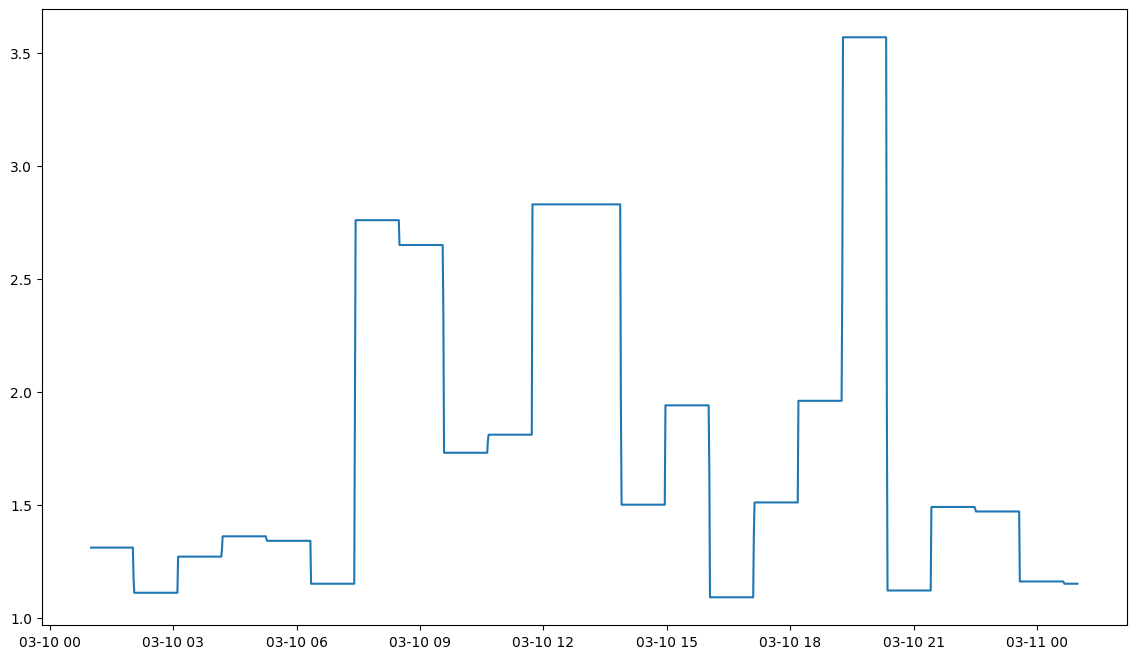

In [65]:
df_24hrs_window = df.iloc[:24*60]
plt.figure(figsize=(14,8))
plt.plot(df_24hrs_window['%_silica_concentrate'])  # Creates visualization for better understanding the nature of target variable

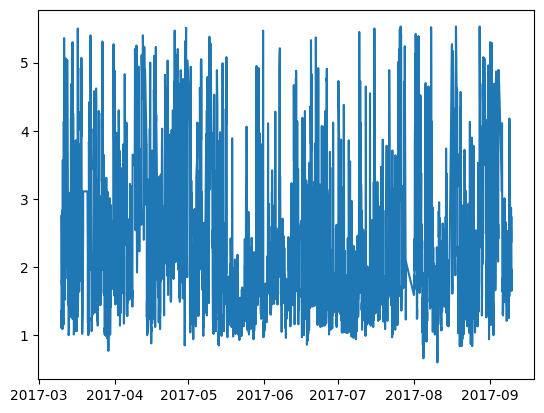

In [93]:
# Since target value is a lab analysis, interpolations will be removed for further analysis

df['delta_target'] = df['%_silica_concentrate'].diff(1).bfill()
silica_df = df[['%_silica_concentrate']][abs(df['delta_target']) > 0]
df.drop(columns='delta_target', inplace=True)

plt.plot(silica_df)

(array([ 653., 4720., 6660., 1360., 3059., 4091., 6741., 4212., 4064.,
        2073.]),
 array([0.6  , 1.093, 1.586, 2.079, 2.572, 3.065, 3.558, 4.051, 4.544,
        5.037, 5.53 ]),
 <BarContainer object of 10 artists>)

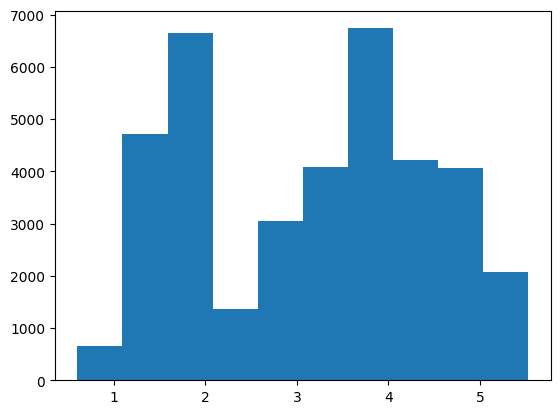

In [94]:
plt.hist(silica_df)

In [95]:
silica_df.describe()

,%_silica_concentrate
count,37633.000000
mean,3.152464
std,1.258981
min,0.600000
25%,1.850000
50%,3.371645
75%,4.165577
max,5.530000


In [96]:
features = list(df.columns)
features.remove('%_silica_concentrate')
features

In [99]:
for feat in features:
	silica_df[feat] = df[feat].reindex(silica_df.index)

silica_df.head()

,%_silica_concentrate,%_iron_feed,%_silica_feed,starch_flow,amina_flow,ore_pulp_flow,ore_pulp_ph,ore_pulp_density,flotation_column_01_air_flow,flotation_column_02_air_flow,...,flotation_column_06_air_flow,flotation_column_07_air_flow,flotation_column_01_level,flotation_column_02_level,flotation_column_03_level,flotation_column_04_level,flotation_column_05_level,flotation_column_06_level,flotation_column_07_level,%_iron_concentrate
2017-03-10 02:02:00,1.176667,55.2,16.98,3175.326667,541.575333,396.210667,10.158933,1.669103,249.558333,248.649667,...,250.422333,250.081667,460.365667,489.545000,446.531000,440.199333,448.522667,475.508667,480.233333,67.010000
2017-03-10 02:03:00,1.110000,55.2,16.98,3211.656667,541.992333,395.625000,10.157200,1.666007,249.700667,249.840000,...,250.228333,249.507000,453.759667,403.571000,443.828333,461.319333,441.119000,431.271667,428.466333,67.060000
2017-03-10 03:07:00,1.270000,55.2,16.98,3375.076667,573.801667,400.835000,10.085400,1.705990,248.994000,251.466000,...,249.642333,250.111000,451.265000,453.785000,453.664333,443.979000,453.834000,459.548667,427.168667,66.970000
2017-03-10 04:11:00,1.300000,55.2,16.98,3146.093333,591.563000,400.244000,9.949977,1.725403,246.478000,249.880333,...,249.869333,249.162667,453.551000,499.171000,445.930000,440.064667,433.495000,437.836333,420.863333,66.896667
2017-03-10 04:12:00,1.360000,55.2,16.98,1343.879467,589.091000,398.130000,9.946447,1.723340,254.996333,253.202000,...,249.367667,251.048667,437.618667,438.766333,450.634333,453.763667,452.861000,464.392667,424.404000,66.750000


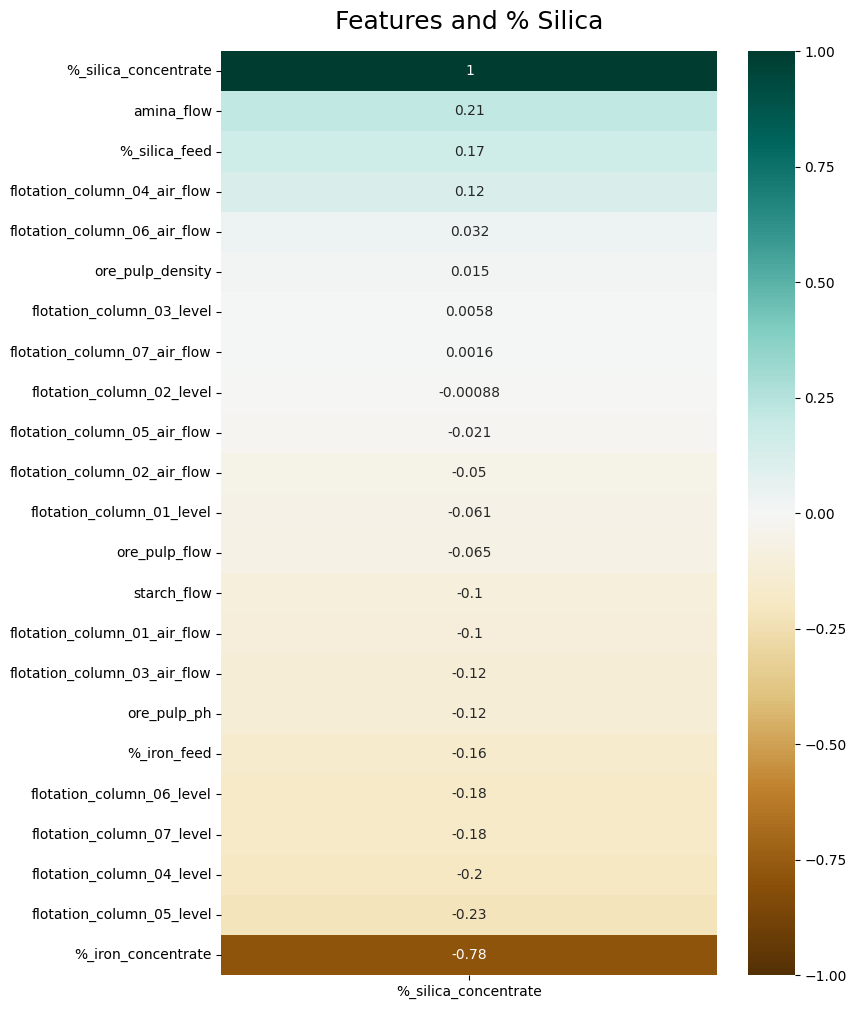

In [103]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(silica_df.corr(method='spearman')[['%_silica_concentrate']].sort_values(by='%_silica_concentrate', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features and % Silica', fontdict={'fontsize':18}, pad=16)
plt.show()

In [120]:

def build_dinamic_lagged_feature(
df: pd.DataFrame,
x:str,
y: str,
lag_ini: t.Optional[float] = 0,
lag_end: t.Optional[float] = 180,
lag_intv: t.Optional[float] = 1,
) -> t.Tuple[float, pd.DataFrame]:

	"""
	realiza correlação cruzada entre a variável resposta "y" e uma variável de entrada "x"
	ao longo de um vetor de lags. Retorna uma tupla contendo o lag de maior correlação e uma
	tabela contendo a correlação em cada lag testado
	"""

	dframe = df.copy()

	lags_to_test = np.arange(lag_ini, lag_end, lag_intv)

	res = {}


	for lag in lags_to_test:
		dframe.loc[:,'lagged_x'] = dframe[x].shift(lag)
		mask = (dframe[y] != dframe[y].shift(+1))
		corr = dframe[mask][['lagged_x', y]].corr()[y]['lagged_x']
		res[lag] = corr

	res = pd.DataFrame([res]).T.reset_index().rename(columns={'index': 'lag', 0: 'correlacao'})
	idx_max = res['correlacao'].idxmax()
	best_correlated_lag = res.loc[idx_max, 'lag']

	return best_correlated_lag, res

In [107]:
features

['%_iron_feed',
 '%_silica_feed',
 'starch_flow',
 'amina_flow',
 'ore_pulp_flow',
 'ore_pulp_ph',
 'ore_pulp_density',
 'flotation_column_01_air_flow',
 'flotation_column_02_air_flow',
 'flotation_column_03_air_flow',
 'flotation_column_04_air_flow',
 'flotation_column_05_air_flow',
 'flotation_column_06_air_flow',
 'flotation_column_07_air_flow',
 'flotation_column_01_level',
 'flotation_column_02_level',
 'flotation_column_03_level',
 'flotation_column_04_level',
 'flotation_column_05_level',
 'flotation_column_06_level',
 'flotation_column_07_level',
 '%_iron_concentrate']

In [121]:
best_lags = {}

for feat in features:
	best_correlated_lag, res = build_dinamic_lagged_feature(df, y='%_silica_concentrate', x=feat)
	best_lags[f'{feat}_lag{int(best_correlated_lag)}'] = res.iloc[best_correlated_lag]['correlacao']

best_lags

{'%_iron_feed_lag179': np.float64(-0.141374431582354),
 '%_silica_feed_lag0': np.float64(0.15241530350177054),
 'starch_flow_lag179': np.float64(-0.04625176022867161),
 'amina_flow_lag2': np.float64(0.2018616907480169),
 'ore_pulp_flow_lag159': np.float64(-0.045897767803981165),
 'ore_pulp_ph_lag0': np.float64(-0.11857499521677954),
 'ore_pulp_density_lag132': np.float64(0.059651665271701085),
 'flotation_column_01_air_flow_lag178': np.float64(-0.11695469489818654),
 'flotation_column_02_air_flow_lag174': np.float64(-0.055490805688376346),
 'flotation_column_03_air_flow_lag177': np.float64(-0.11577365836665282),
 'flotation_column_04_air_flow_lag155': np.float64(0.16174178941316328),
 'flotation_column_05_air_flow_lag105': np.float64(-0.04841106596047671),
 'flotation_column_06_air_flow_lag17': np.float64(0.02311992250089736),
 'flotation_column_07_air_flow_lag168': np.float64(-0.011517517314792274),
 'flotation_column_01_level_lag171': np.float64(-0.003275880832633204),
 'flotation_co

In [113]:
best_correlated_lag

np.int64(99)

In [117]:
res.iloc[best_correlated_lag]['correlacao']

np.float64(-0.6852157055644387)